тут будет короткое описание того что содержится в репозитории и описаны нужные файлы. 

в src нужно смотреть на 
1. proposed_algos.py -- реализации предлагаемых алгоритмов. Каждый алгоритм получает на вход последовательность запросов и необходимые параметры. Внутри они не смотрят на весь список запросов как на заранее известный, просто так было удобнее реализовать
2. dataset_generator.py -- генераторы последовательности запросов. Наиболее актуальные это `generate_with_shift` -- сдвигающаяся во времени гауссиана, из которой берутся запросы, `generate_distribution` -- генерирует распределение и из него генерирует запросы. 

Примеры работы алгоритмов приведены в ячейках ниже. каждый алгоритм по результатам работы возвращает miss rate и какую-то дополнительную информацию. 

Наша цель -- подобрать функцию сравнения весов при удалении элемента с кеша. Так как у всех алгоритмов структура похожая, у всех можно найти этот кусок кода внутри цикла (если что тыкните меня и я покажу).

In [1]:
import numpy as np
import os
import sys
from pathlib import Path
from importlib import reload
sys.path.append(os.getcwd())
sys.path.append(os.getcwd() + '/src')
sys.path.append(os.getcwd() + '/cacheing')
sys.path.append(os.getcwd() + '/cacheing/benchmark')

%load_ext autoreload
%autoreload 2


# policies

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import dataset_generator as generators
from collections import Counter
from proposed_algos import cache_obs, cache_prob, cache_prob_mul, cache_prob_mul_separate

t, N, K, disperce, cycles = 100_000, 1000, 100, 0.1, 2
shift_time = t // cycles

requests = list(generators.generate_with_shift(N, t, shift_time, disperce, eps = 0.01))
# requests = list(generators.generate_zipf(t, 1.1, random_seed = 0))

p_list = range(0, 4, 1)
miss_rates = [cache_obs(requests, K, p, N) for p in p_list]
miss_prob_sep, weights_sep, p_for_step_sep = cache_prob_mul_separate(requests, K,  N,
                 gamma=1.52e-03, beta = 1.25e+00)
miss_prob = [miss_prob_sep]

miss_prob_mul, weights_mul, p_for_step = cache_prob_mul(requests, K,  N,
            1.00e-06, beta = 1.09e+00)
miss_prob_mul = [miss_prob_mul]

# plt.plot(p_list, miss_rates_prob, label = "prob")
plt.plot(p_list, miss_rates, '+', label = 'full')
plt.plot(0, miss_prob, 'o')
plt.plot(1, miss_prob_mul, 'o')
plt.legend()
plt.grid()
plt.ylabel("miss rate")
plt.xlabel("observation_len")
plt.show()

counts = Counter(requests)
tmp = {key: (counts[key], weights_mul[key]) for key in counts.keys()}
print(tmp[1], tmp[2], tmp[3], len(tmp), np.mean(list(weights_mul.values())))

def plot_counts(w):
    plt.plot(counts.values(), w.values(), '.')
    plt.xscale('log')
    plt.grid()
    plt.xlabel('num requests')
    plt.ylabel('w in final')
    plt.show()
    
# plot_counts(weights)
plot_counts(weights_mul)
plt.plot(p_for_step)


то что было рассказано в последний раз

0 0.5
1 1
2 2
3 3


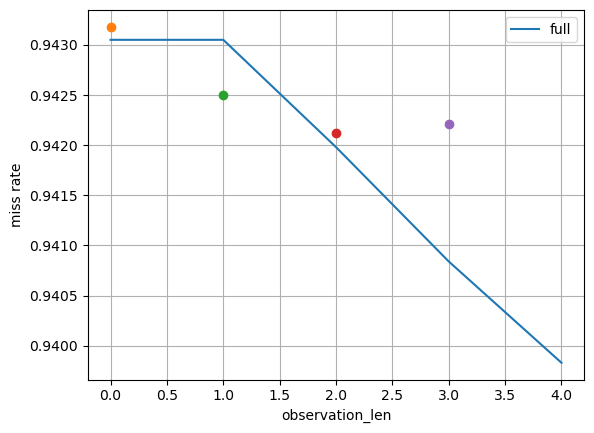

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import dataset_generator as generators
from collections import Counter
from proposed_algos import cache_obs, cache_prob, cache_prob_mul, cache_prob_mul_separate, cache_fixed_prob

t, N, K, disperce, cycles = 1_00_000, 1000, 50, 0.2, 6
shift_time = t // cycles
# dataset = generate(N, t, 0)
# requests = list(dataset)
# seed = np.random.randint(1000)

# requests = list(generators.generate_with_shift(N, t, shift_time, disperce, eps = 0.01))
requests, p_s = generators.generate_distribution(N, t, 10)
# requests = list(generators.generate_zipf(t, 1.1, random_seed = 0))

p_list = range(0, 5, 1)
miss_rates = [cache_obs(requests, K, p, N) for p in p_list]
plt.plot(p_list, miss_rates, label = 'full')

weights_sep = 0
for i, pow in enumerate([0.5, 1, 2, 3]):
    print(i, pow)
    miss_fixed_rates, weights_sep = cache_fixed_prob(requests, K,N, pow, gamma = 0.005)
    plt.plot(i, miss_fixed_rates, 'o')



plt.legend()
plt.grid()
plt.ylabel("miss rate")
plt.xlabel("observation_len")
plt.show()


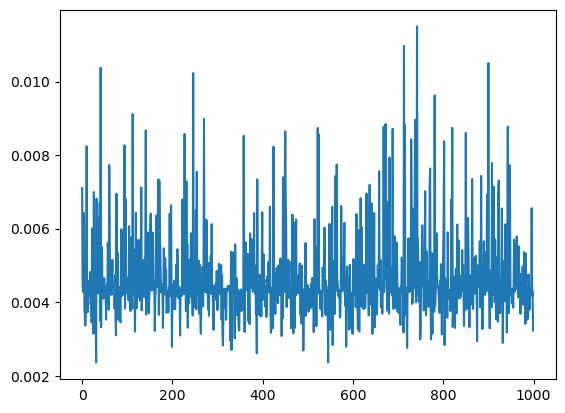

In [5]:
plt.plot(weights_sep)

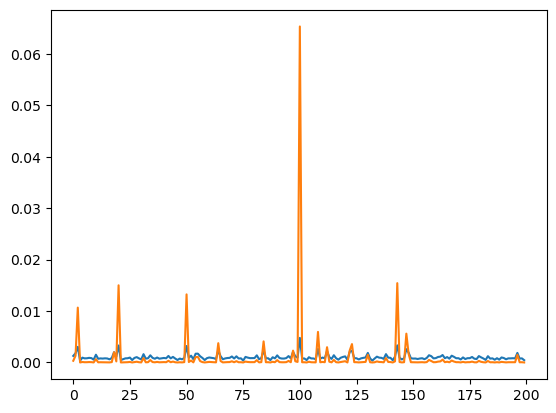

In [6]:
to = -200
tmp = weights_sep ** 2
tmp = tmp / np.sum(tmp)
plt.plot(tmp[to:])

tmp = weights_sep ** 8
tmp = tmp / np.sum(tmp)
plt.plot(tmp[to:])

задача на подумать

miss_rate >= 1 - sup(p bests)

какая нижняя граница если моделируем зависимость от предыдущих запросов. Для начала можем рассмотреть марковскую цепь. Если не зависит от предыдущих, то просто храним K элементов с наибольшими вероятностями, 

Также получить верхние оценки на работу алгоритма при этой функции сравнения.

Рассмотреть сравнение удаляемой страницы с несколькими последними страницами.

